In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
training_set = pd.read_csv('Train_Titanic.csv')

In [7]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step #2: EXPLORE/VISUALIZE DATASET

In [16]:
survived = training_set[training_set['Survived'] == 1]
no_survived = training_set[training_set['Survived'] == 0]

In [19]:
print("Total = ", len(training_set))

print("Number of Survived passenger =", len(survived))
print("Percentage Survived =", 1.*len(survived)/len(training_set)*100.0, "%")

print("Did not Survive =", len(no_survived))
print("Percentage who did not survive =", 1.*len(no_survived)/len(training_set)*100.0, '%')

Total =  891
Number of Survived passenger = 342
Percentage Survived = 38.38383838383838 %
Did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


In [25]:
print(training_set.dtypes)
print(training_set["Survived"].unique())
print(training_set['Pclass'].unique())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
[0 1]
[3 1 2]


<Axes: xlabel='Pclass', ylabel='count'>

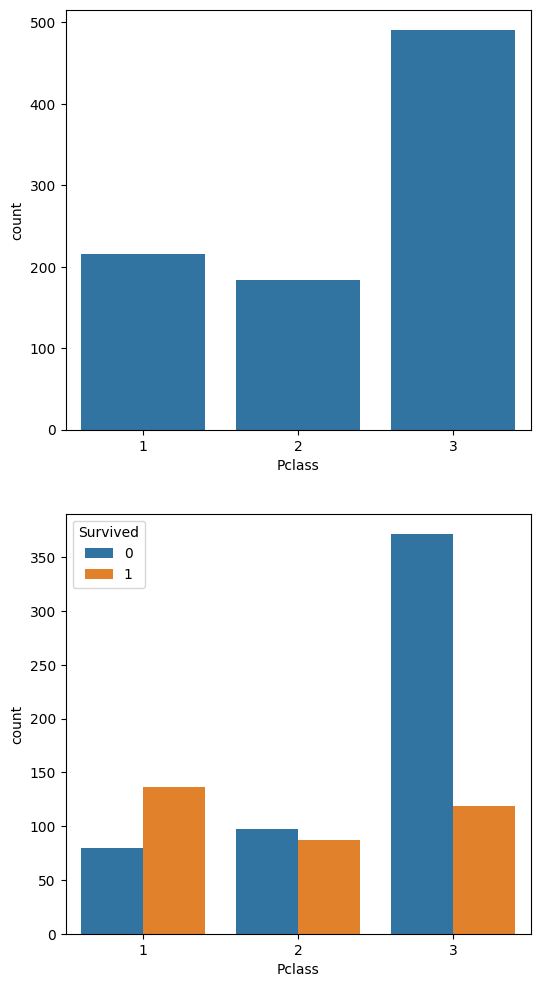

In [27]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set)

plt.subplot(212)
sns.countplot(x='Pclass', hue= 'Survived', data=training_set)


<Axes: xlabel='SibSp', ylabel='count'>

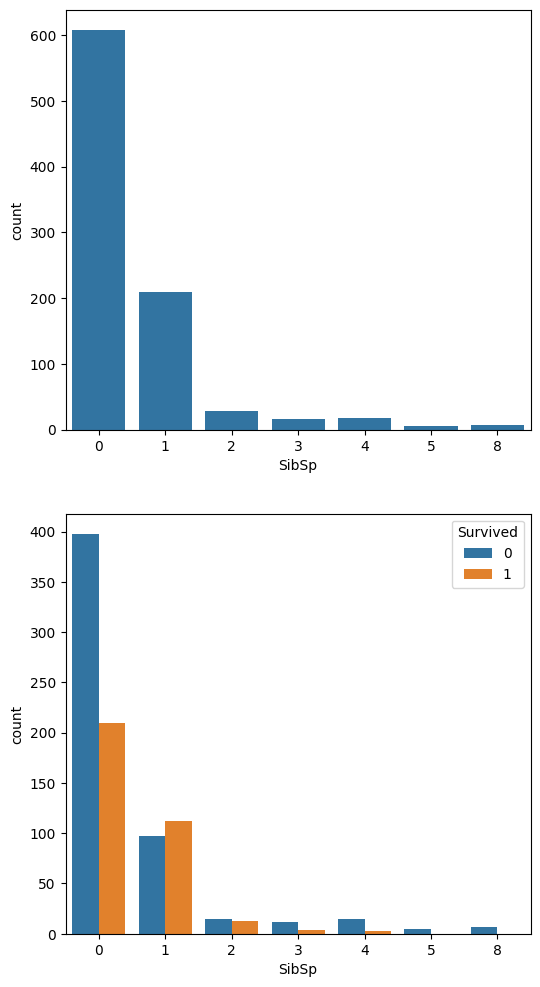

In [28]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=training_set)

plt.subplot(212)
sns.countplot(x = 'SibSp', hue='Survived', data=training_set)

<Axes: xlabel='Parch', ylabel='count'>

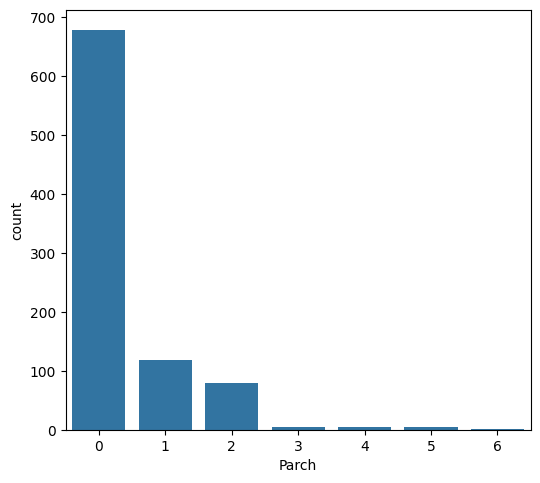

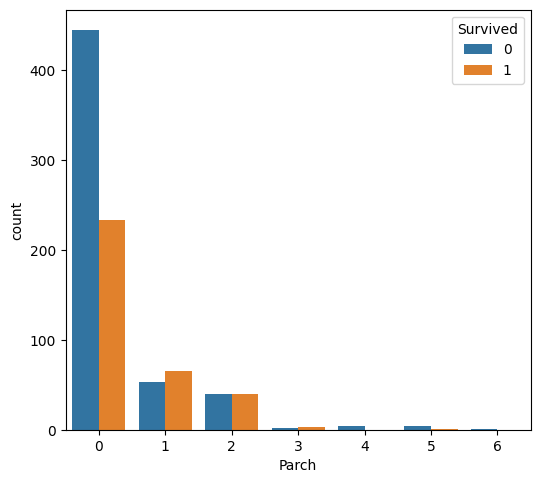

In [31]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Parch', data=training_set)

plt.figure(figsize=[6,12])
plt.subplot(212)
sns.countplot(x='Parch', hue='Survived', data=training_set)

<Axes: xlabel='Embarked', ylabel='count'>

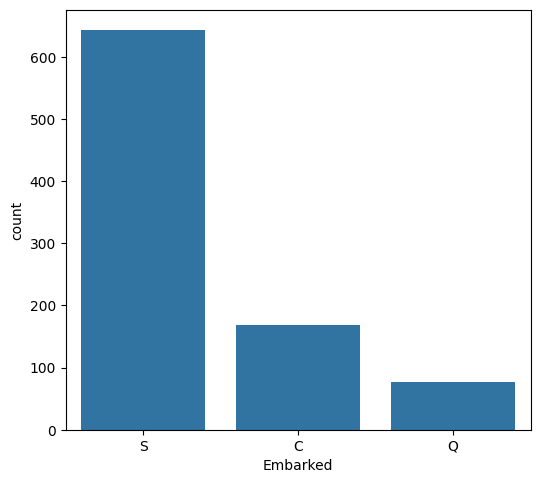

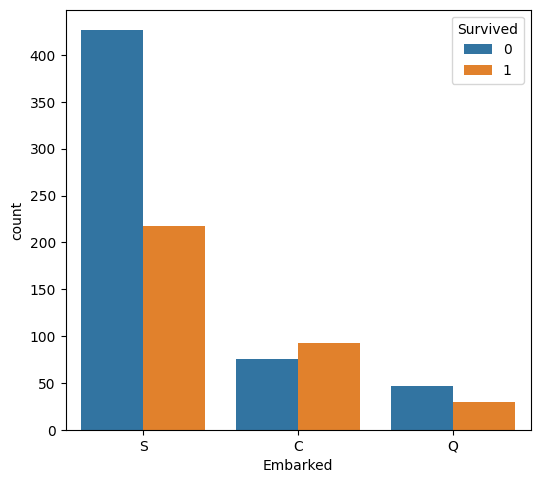

In [33]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Embarked', data=training_set)

plt.figure(figsize=[6,12])
plt.subplot(212)
sns.countplot(x='Embarked', hue='Survived', data=training_set)

<Axes: xlabel='Sex', ylabel='count'>

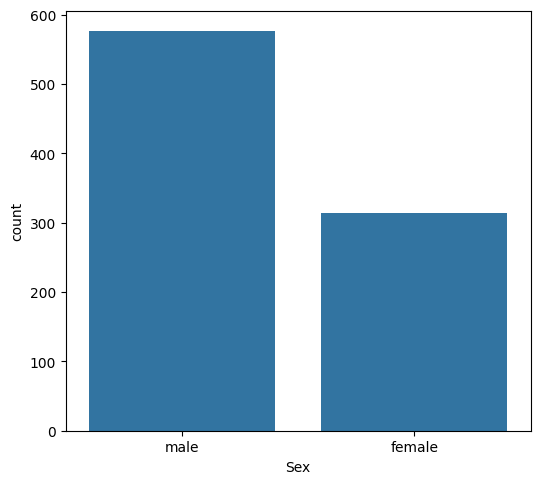

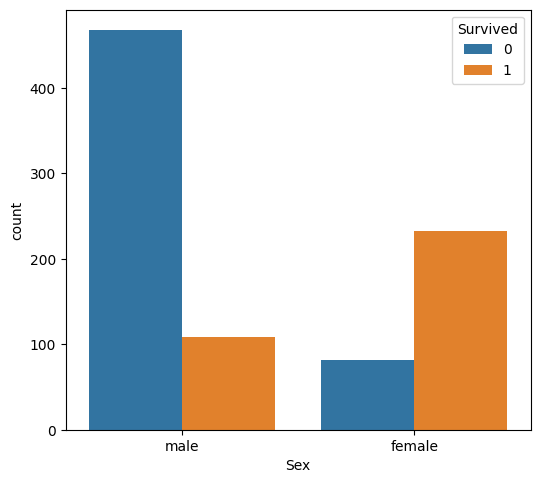

In [36]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Sex', data=training_set)

plt.figure(figsize=[6,12])
plt.subplot(212)
sns.countplot(x='Sex', hue='Survived', data=training_set)

<Axes: xlabel='Age', ylabel='count'>

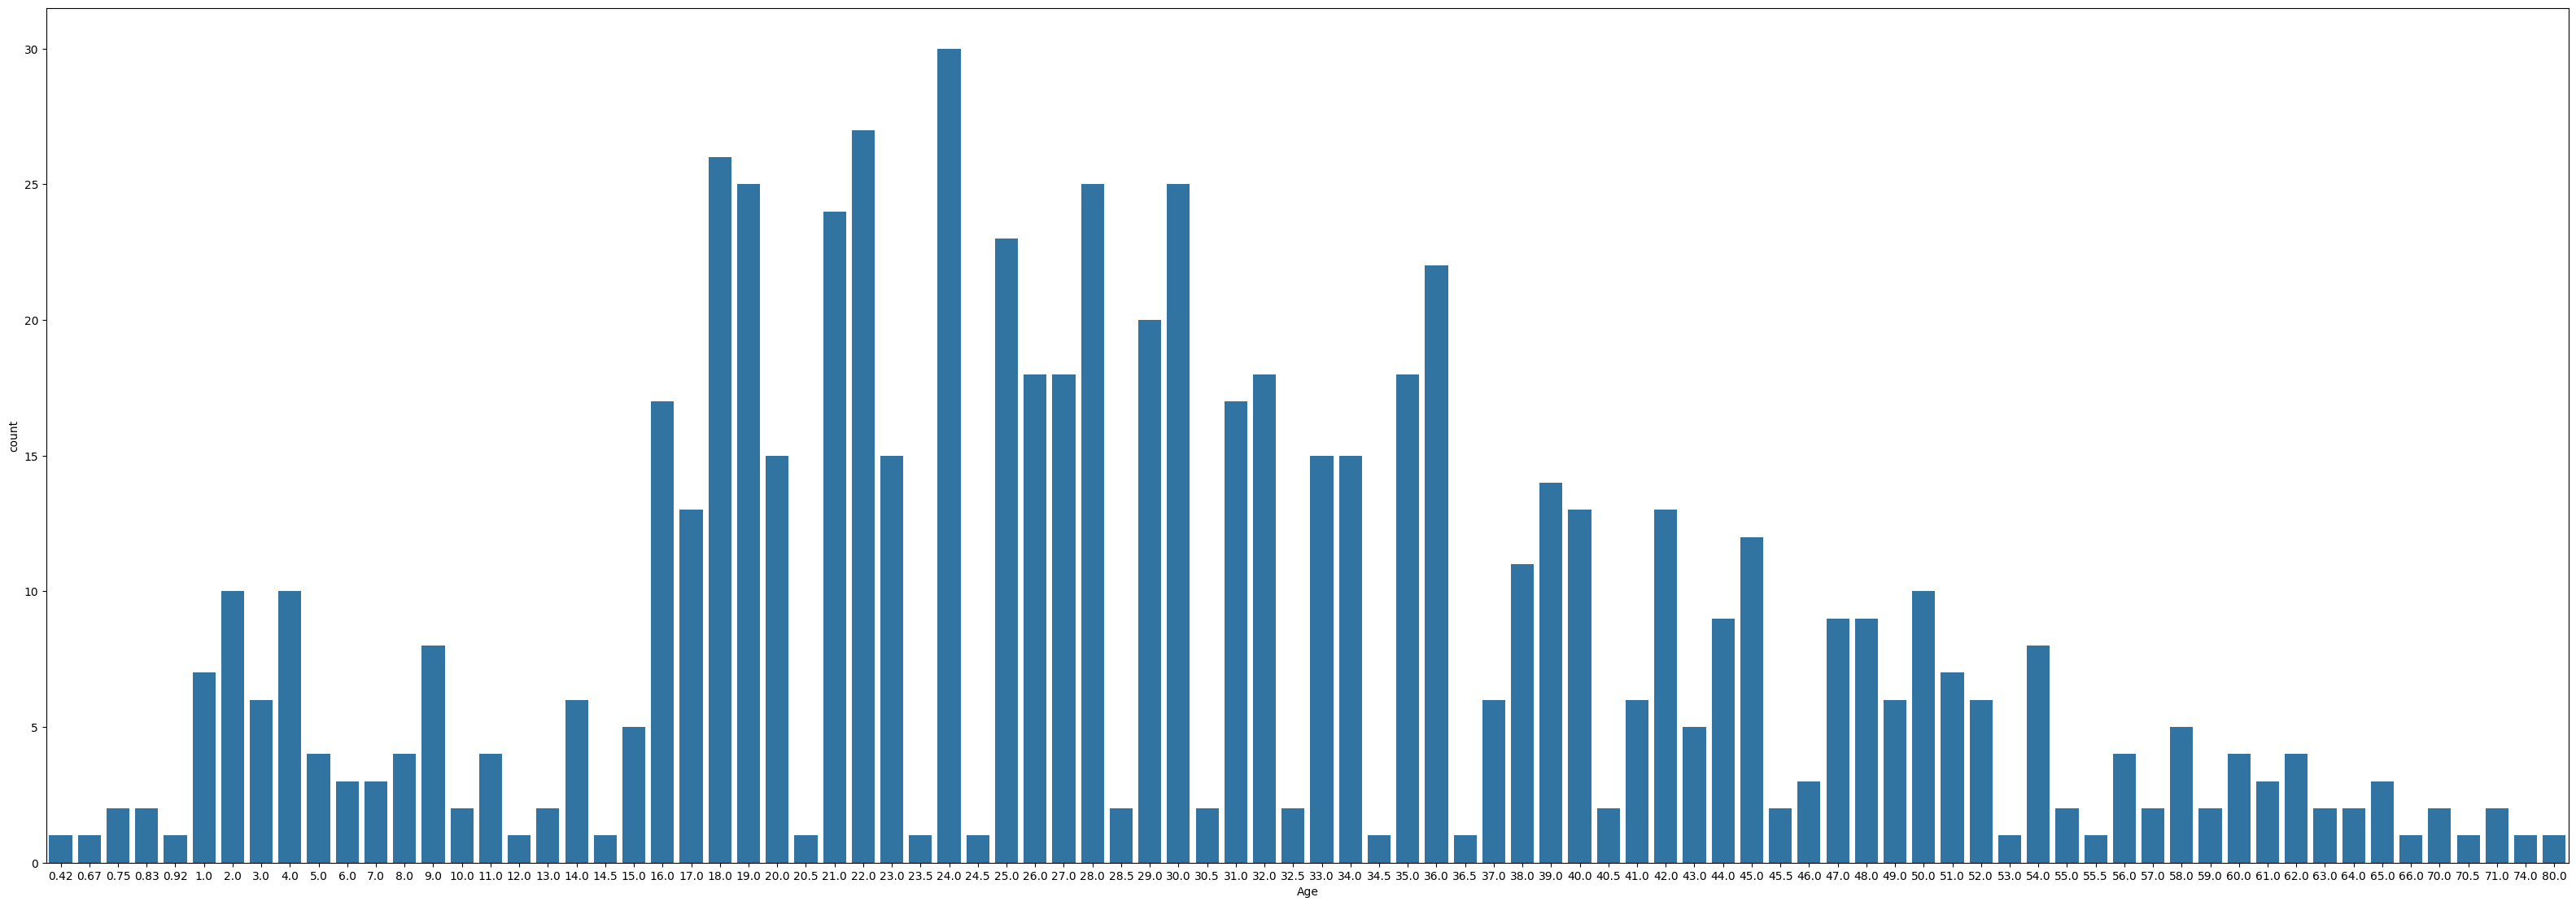

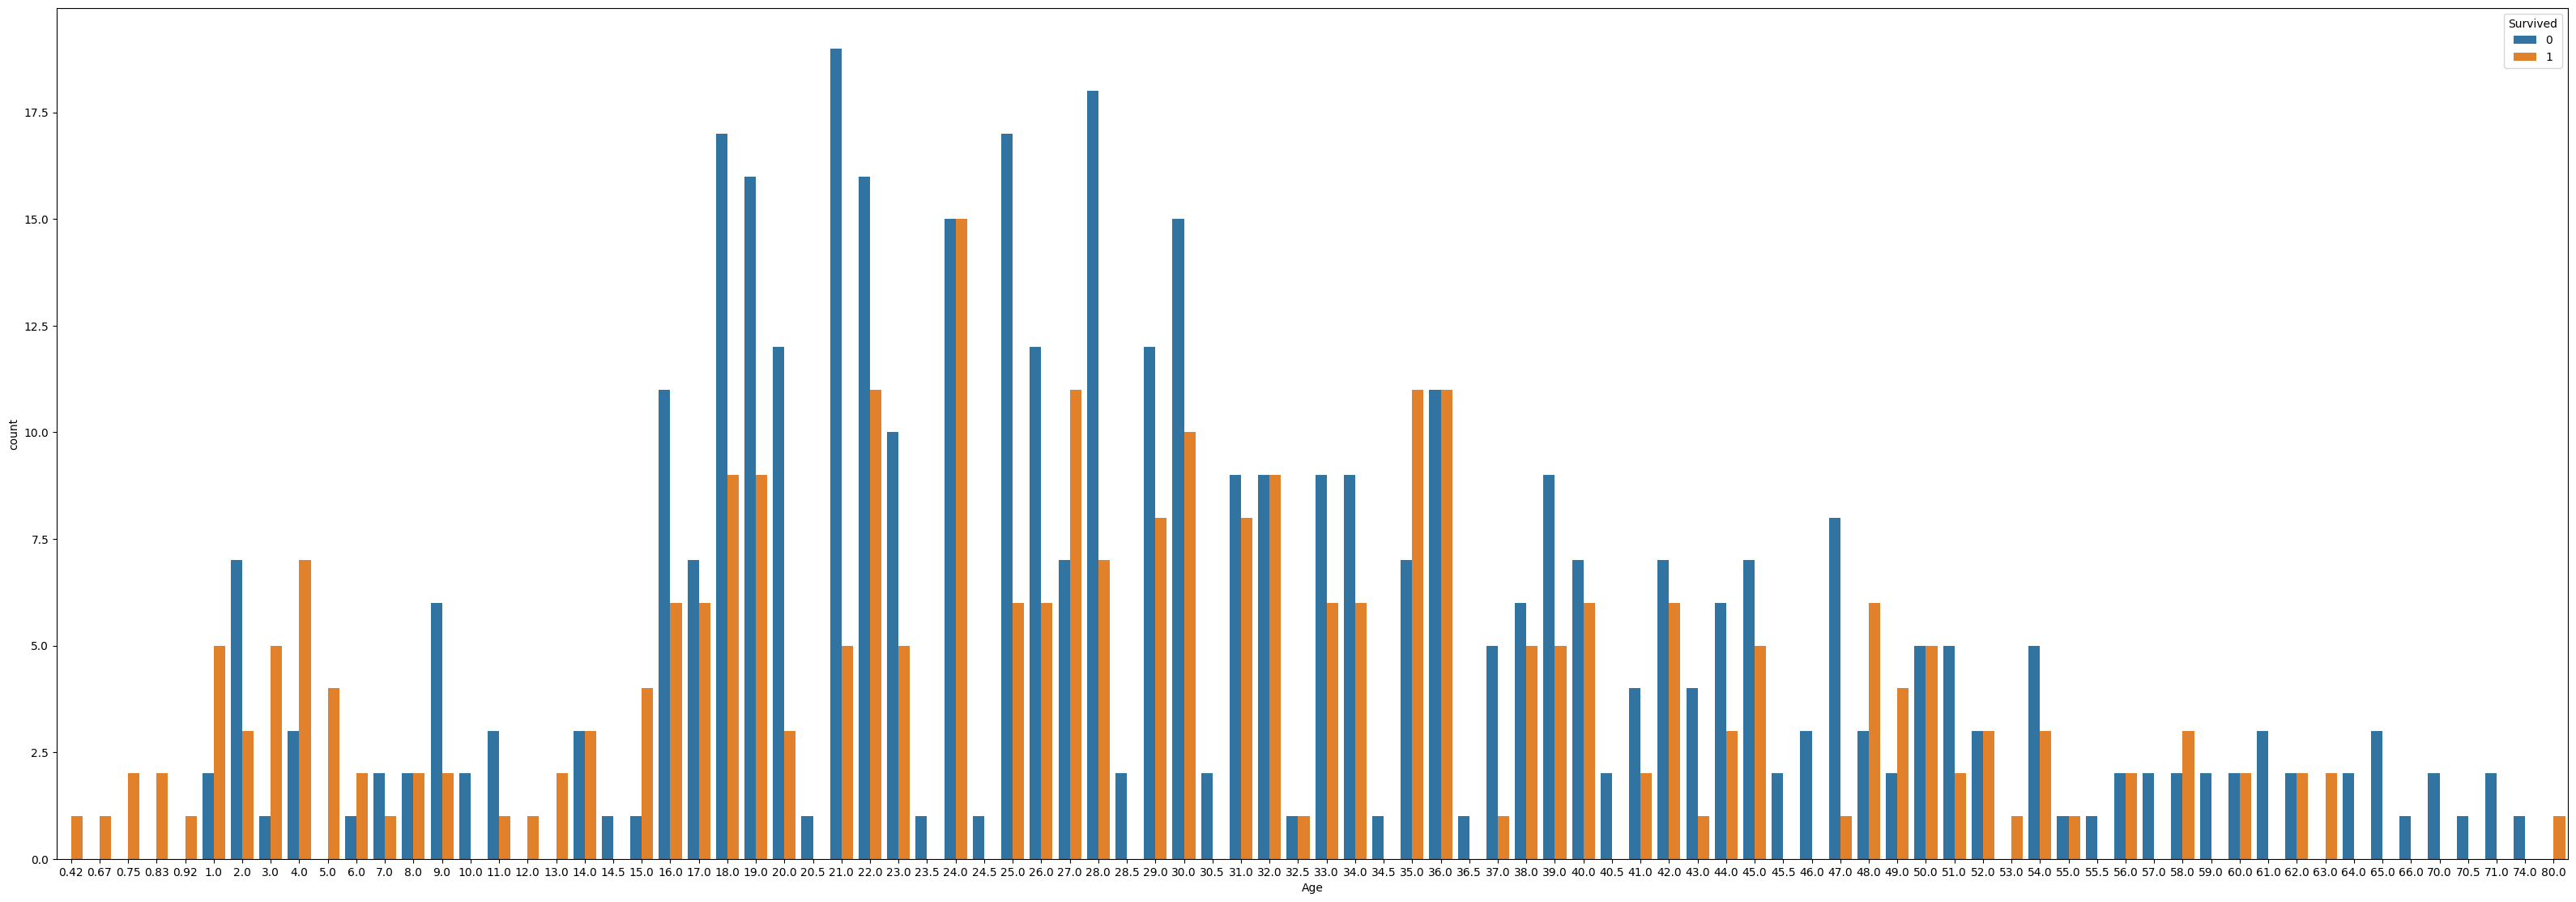

In [39]:
plt.figure(figsize=[40,30])
plt.subplot(211)
sns.countplot(x='Age', data=training_set)

plt.figure(figsize=[40,30])
plt.subplot(212)
sns.countplot(x='Age', hue='Survived', data=training_set)

<Axes: >

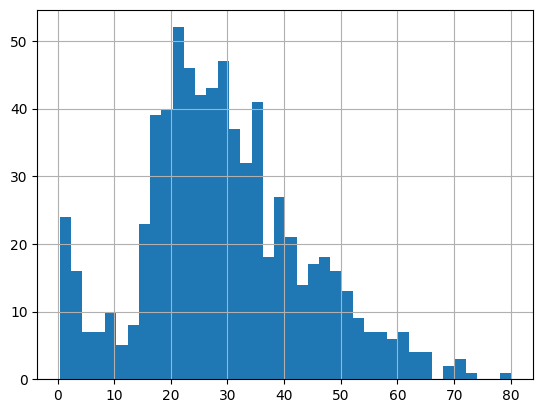

In [40]:
training_set['Age'].hist(bins=40)

<Axes: xlabel='Fare', ylabel='count'>

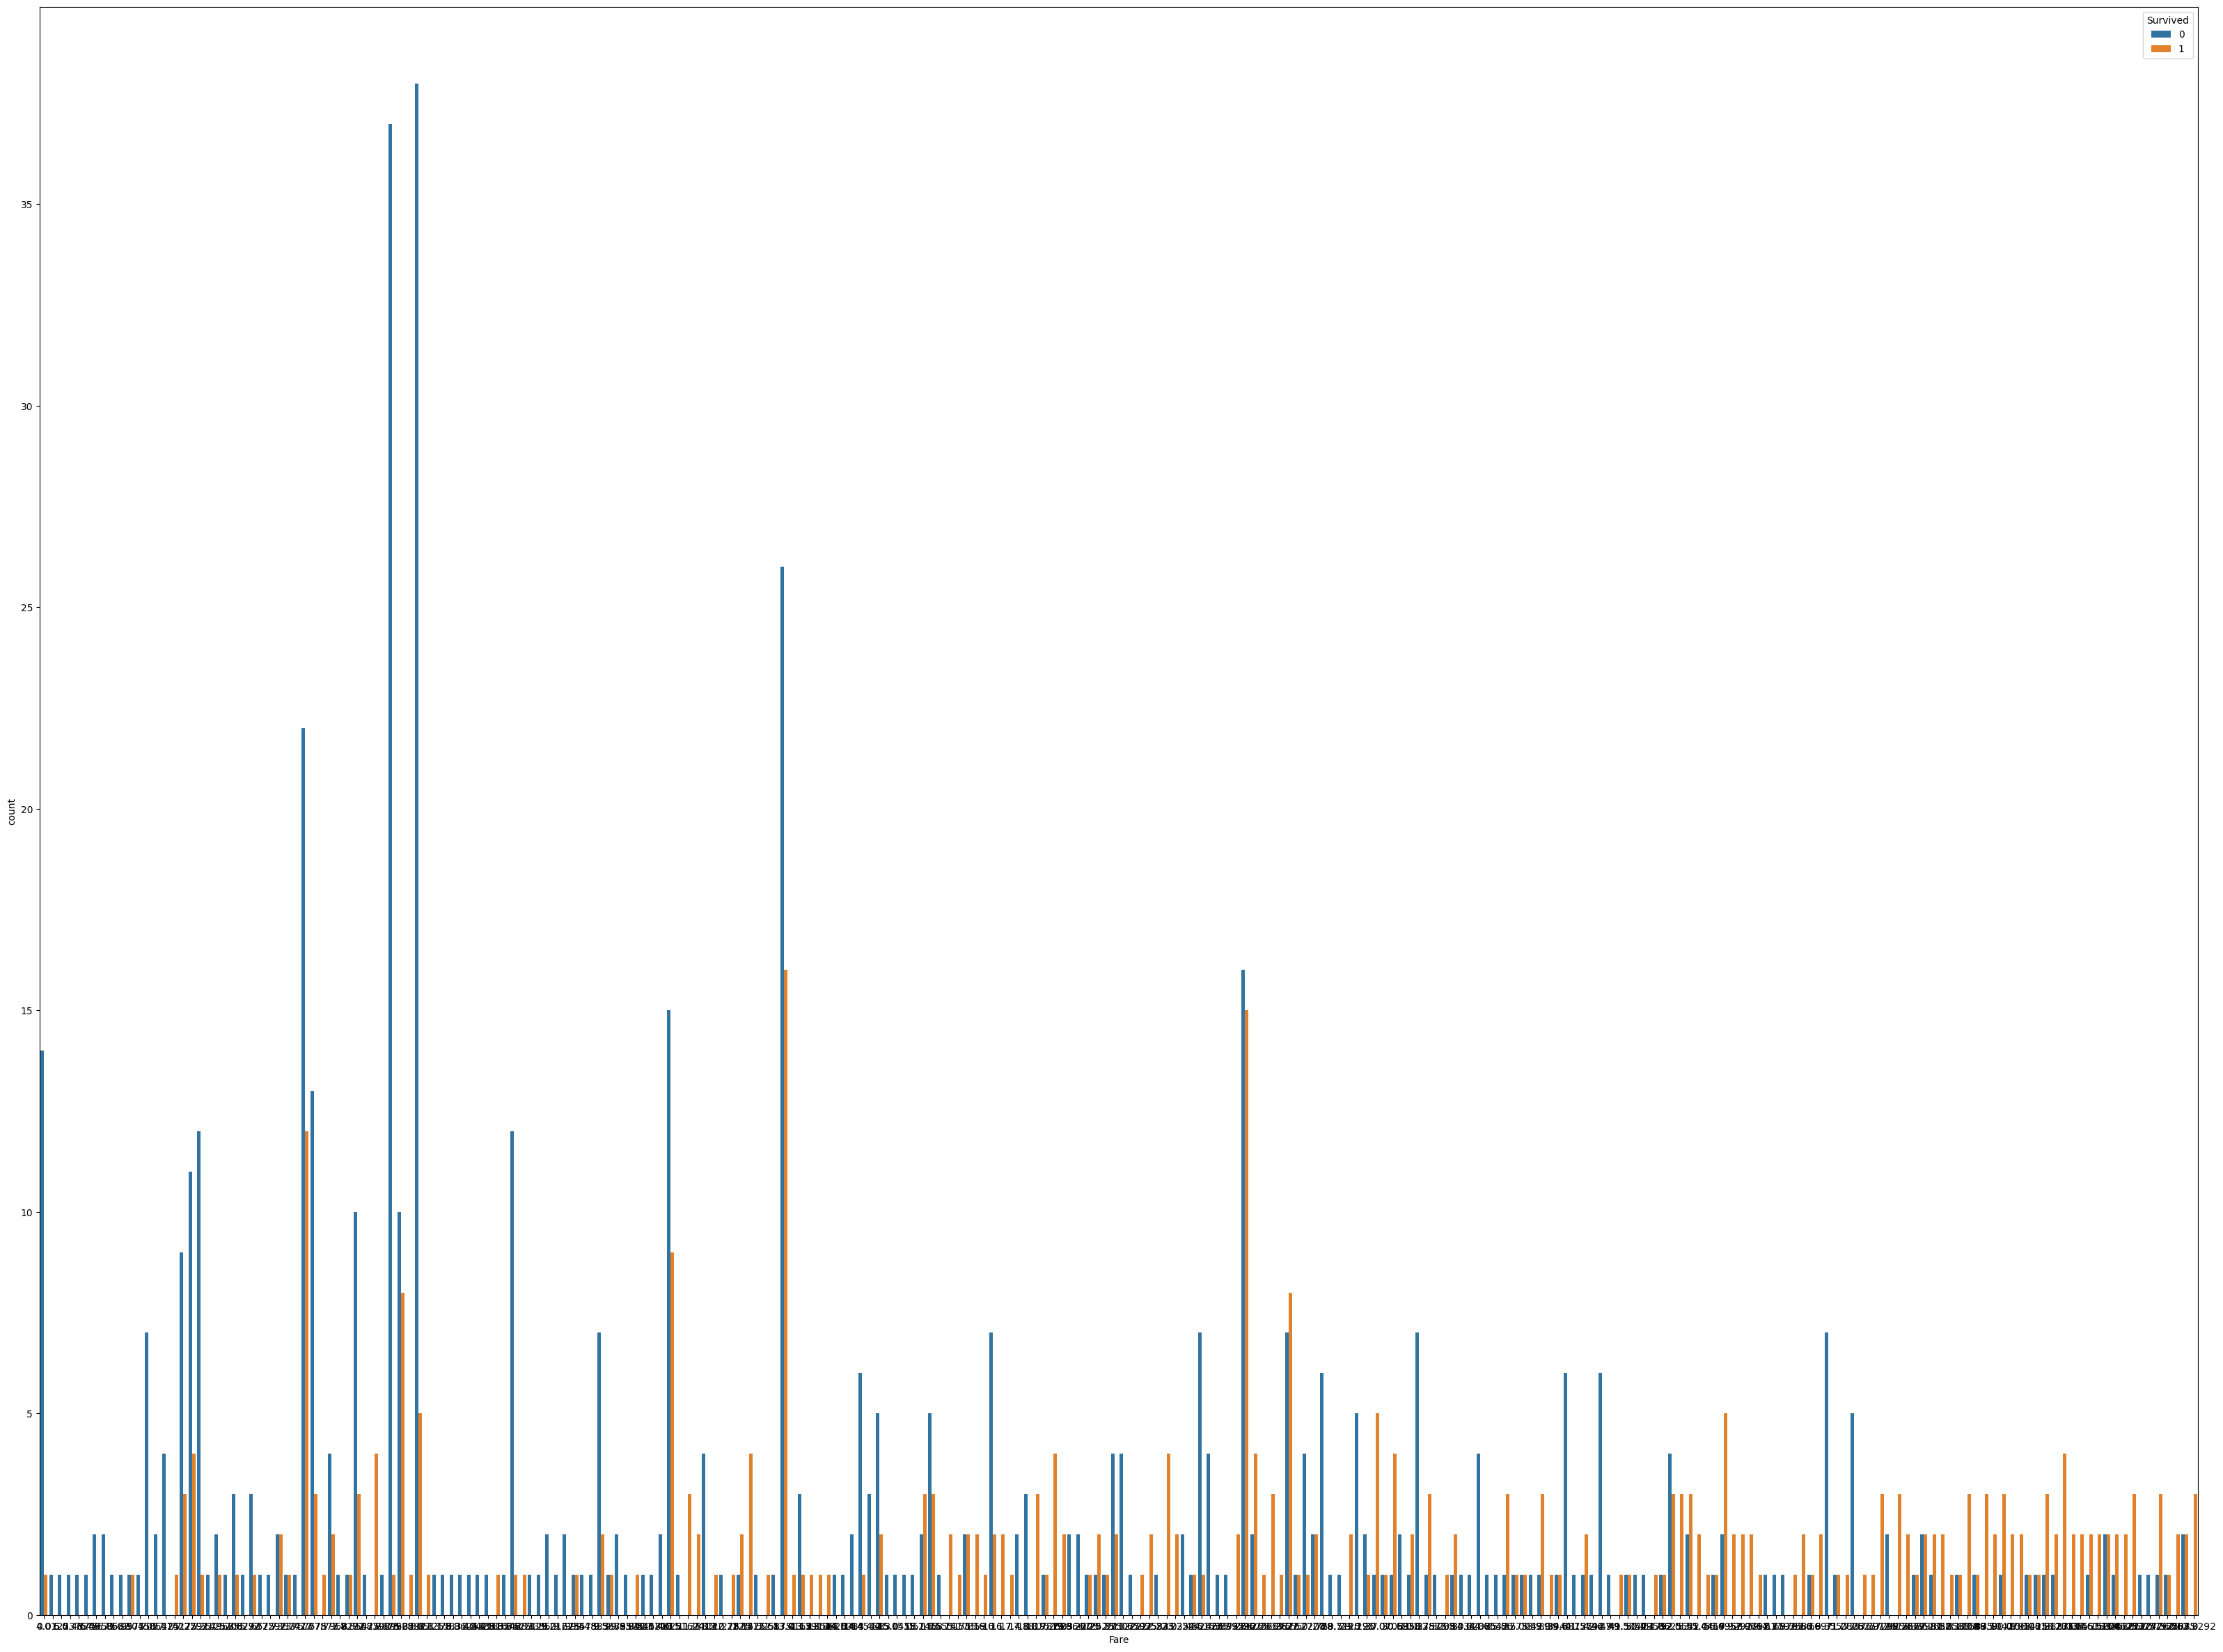

In [42]:
plt.figure(figsize=[40,30])
sns.countplot(x='Fare', hue='Survived', data=training_set)

<Axes: >

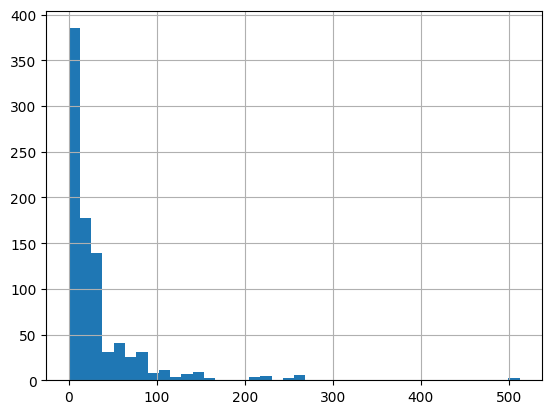

In [43]:
training_set['Fare'].hist(bins=40)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING

<Axes: >

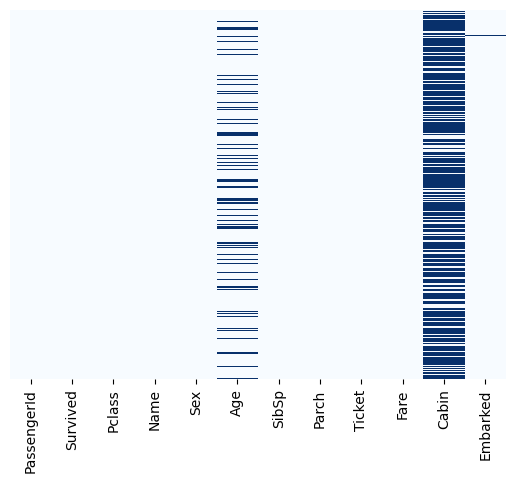

In [44]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [46]:
training_set.drop('Cabin', axis=1, inplace=False)
training_set.drop('Cabin', axis=1, inplace=True)

In [47]:
training_set.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis=1, inplace=True)

In [48]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<Axes: >

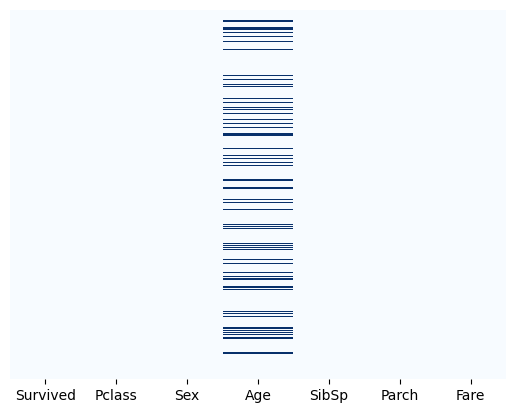

In [50]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<Axes: xlabel='Sex', ylabel='Age'>

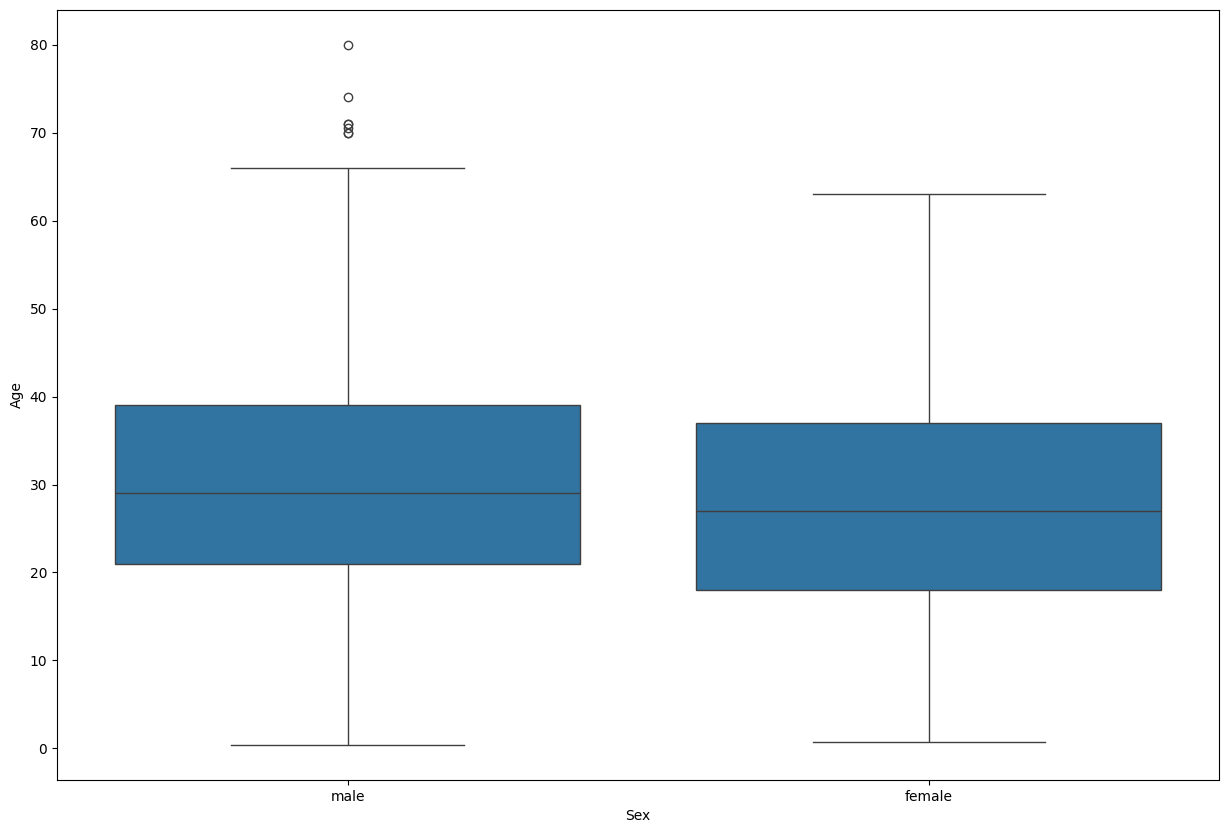

In [52]:
plt.figure(figsize=[15,10])
sns.boxplot(x='Sex', y='Age', data=training_set)

In [53]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 'male':
            return 29
        else:
            return 25
    else:
        return age

In [54]:
training_set['Age'] = training_set[['Age', 'Sex']].apply(
    lambda row: Fill_Age((row['Age'], row['Sex'])), axis=1
)

In [55]:
print(training_set.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


<Axes: >

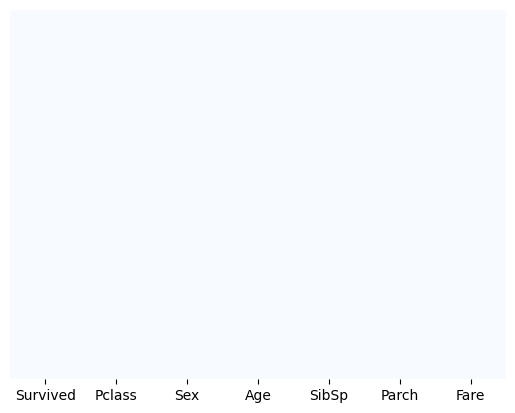

In [56]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues')

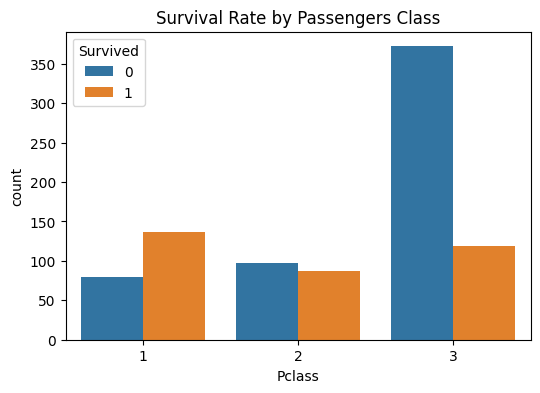

In [60]:
plt.figure(figsize=[6,4])

sns.countplot(x='Pclass', hue='Survived', data=training_set)
plt.title('Survival Rate by Passengers Class')
plt.show()

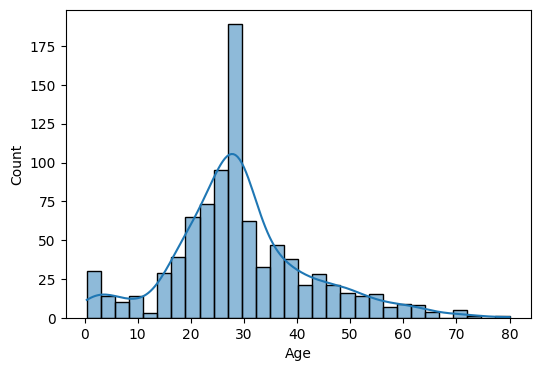

In [62]:
plt.figure(figsize=[6,4])
sns.histplot(x='Age', data=training_set, kde=True)
plt.show()

In [63]:
pd.get_dummies(training_set['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [64]:
male = pd.get_dummies(training_set['Sex'], drop_first=True)



In [65]:
training_set.drop(['Sex'], axis=1, inplace=True)

In [66]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [67]:
training_set = pd.concat([training_set, male], axis=1)

In [68]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,25.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


# STEP#4: MODEL TRAINING

In [69]:
X = training_set.drop('Survived', axis=1).values
y = training_set['Survived'].values

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# STEP#5: MODEL TESTING

In [75]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [76]:
from sklearn.metrics import confusion_matrix

<Axes: >

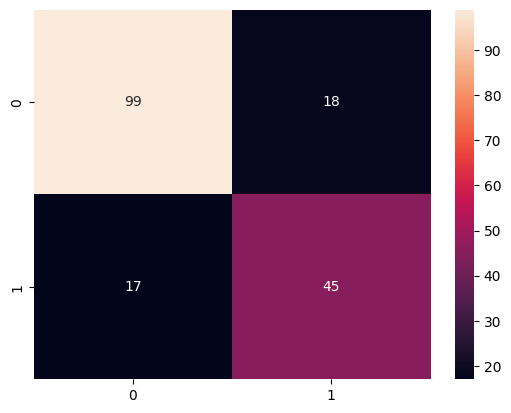

In [77]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

